# Deep model explanation with channel-wise occlusion

In [33]:
import numpy as np
import pandas as pd
# import h5py
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from brain_age_prediction import utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

In [25]:
save_dir = '/ritter/share/projects/laura_riedel_thesis/'
# load colour maps
network_colour_map = viz.get_colour_map('network')
area_colour_map = viz.get_colour_map('area')

## Global explanations

In [26]:
occlusion_df = utils.get_occlusion_overview('deep')
occlusion_df

,eid,parcellation,hemisphere,network,area,pred diff
0,1217464,LH_Vis_1,LH,Vis,full Vis,1.127445
1,1217464,LH_Vis_2,LH,Vis,full Vis,1.259075
2,1217464,LH_Vis_3,LH,Vis,full Vis,0.466789
3,1217464,LH_Vis_4,LH,Vis,full Vis,-1.014702
4,1217464,LH_Vis_5,LH,Vis,full Vis,0.085968
...,...,...,...,...,...,...
499995,1053119,RH_Default_PFCdPFCm_1,RH,Default,PFCdPFCm,-0.376659
499996,1053119,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,0.048668
499997,1053119,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,1.157719
499998,1053119,RH_Default_pCunPCC_1,RH,Default,pCunPCC,-0.409286


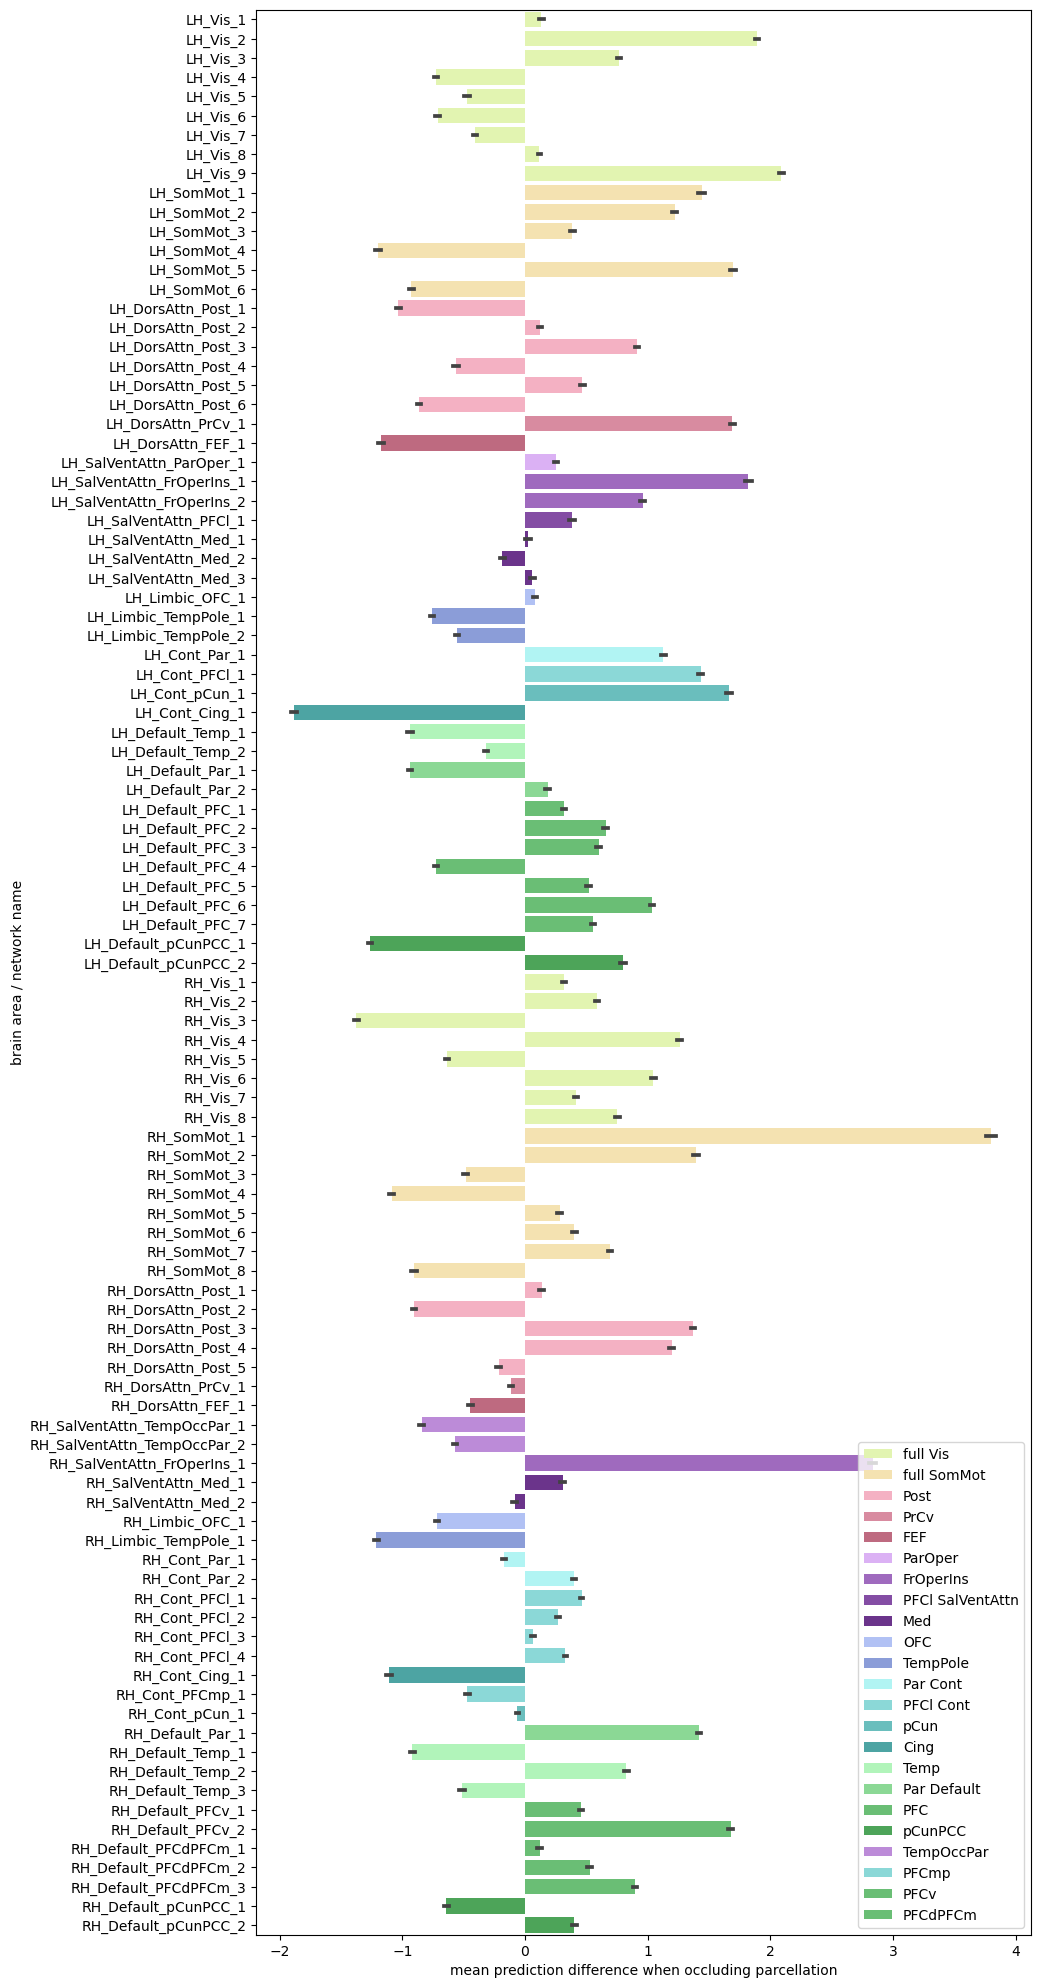

In [23]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=occlusion_df,
            x='pred diff',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation',
       ylabel='brain area / network name')
ax.legend(loc='lower right')
plt.show()

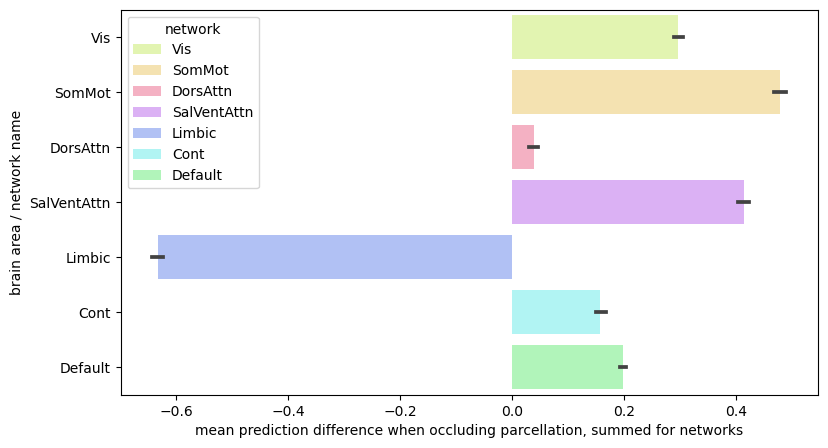

In [5]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=occlusion_df,
            x='pred diff',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation, summed for networks',
       ylabel='brain area / network name')
plt.show()

In [4]:
# add area mean + area weight column
occlusion_df, area_mean_df = utils.calculate_areamean_weights_df(occlusion_df, 'pred diff')
occlusion_df

,eid,parcellation,hemisphere,network,area,pred diff,area weight,mean area pred diff
0,1217464,LH_Vis_1,LH,Vis,full Vis,1.127445,1.000,0.296517
1,1217464,LH_Vis_2,LH,Vis,full Vis,1.259075,1.000,0.296517
2,1217464,LH_Vis_3,LH,Vis,full Vis,0.466789,1.000,0.296517
3,1217464,LH_Vis_4,LH,Vis,full Vis,-1.014702,1.000,0.296517
4,1217464,LH_Vis_5,LH,Vis,full Vis,0.085968,1.000,0.296517
...,...,...,...,...,...,...,...,...
499995,1450682,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,0.803688,0.125,0.515482
499996,1450682,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,1.445251,0.125,0.515482
499997,1053119,RH_Default_PFCdPFCm_1,RH,Default,PFCdPFCm,-0.376659,0.125,0.515482
499998,1053119,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,0.048668,0.125,0.515482


In [7]:
area_mean_df

,network,area,area weight,mean area pred diff
0,Vis,full Vis,1.000000,0.296517
1,SomMot,full SomMot,1.000000,0.478596
2,DorsAttn,Post,0.733333,0.055948
3,DorsAttn,PrCv,0.133333,0.786748
4,DorsAttn,FEF,0.133333,-0.809983
5,SalVentAttn,Med,0.416667,0.023612
6,SalVentAttn,FrOperIns,0.250000,1.872218
7,SalVentAttn,TempOccPar,0.166667,-0.707209
8,SalVentAttn,ParOper,0.083333,0.253100
9,SalVentAttn,PFCl SalVentAttn,0.083333,0.383618


In [8]:
weighted_networks_df = utils.get_weighted_network_average(occlusion_df, value='mean area pred diff')
weighted_networks_df

,network,weighted mean
0,Vis,0.296517
1,SomMot,0.478596
2,DorsAttn,0.051758
3,SalVentAttn,0.381204
4,Limbic,-0.681657
5,Cont,0.315410
6,Default,0.173740


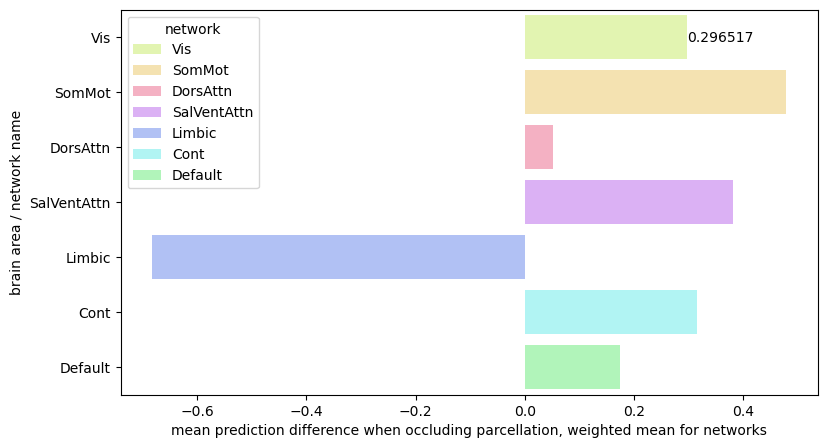

In [9]:
# weighted network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=weighted_networks_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation, weighted mean for networks',
       ylabel='brain area / network name')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

### Redo global explanations with absolute values

In [12]:
occlusion_df['abs pred diff'] = occlusion_df['pred diff'].abs()

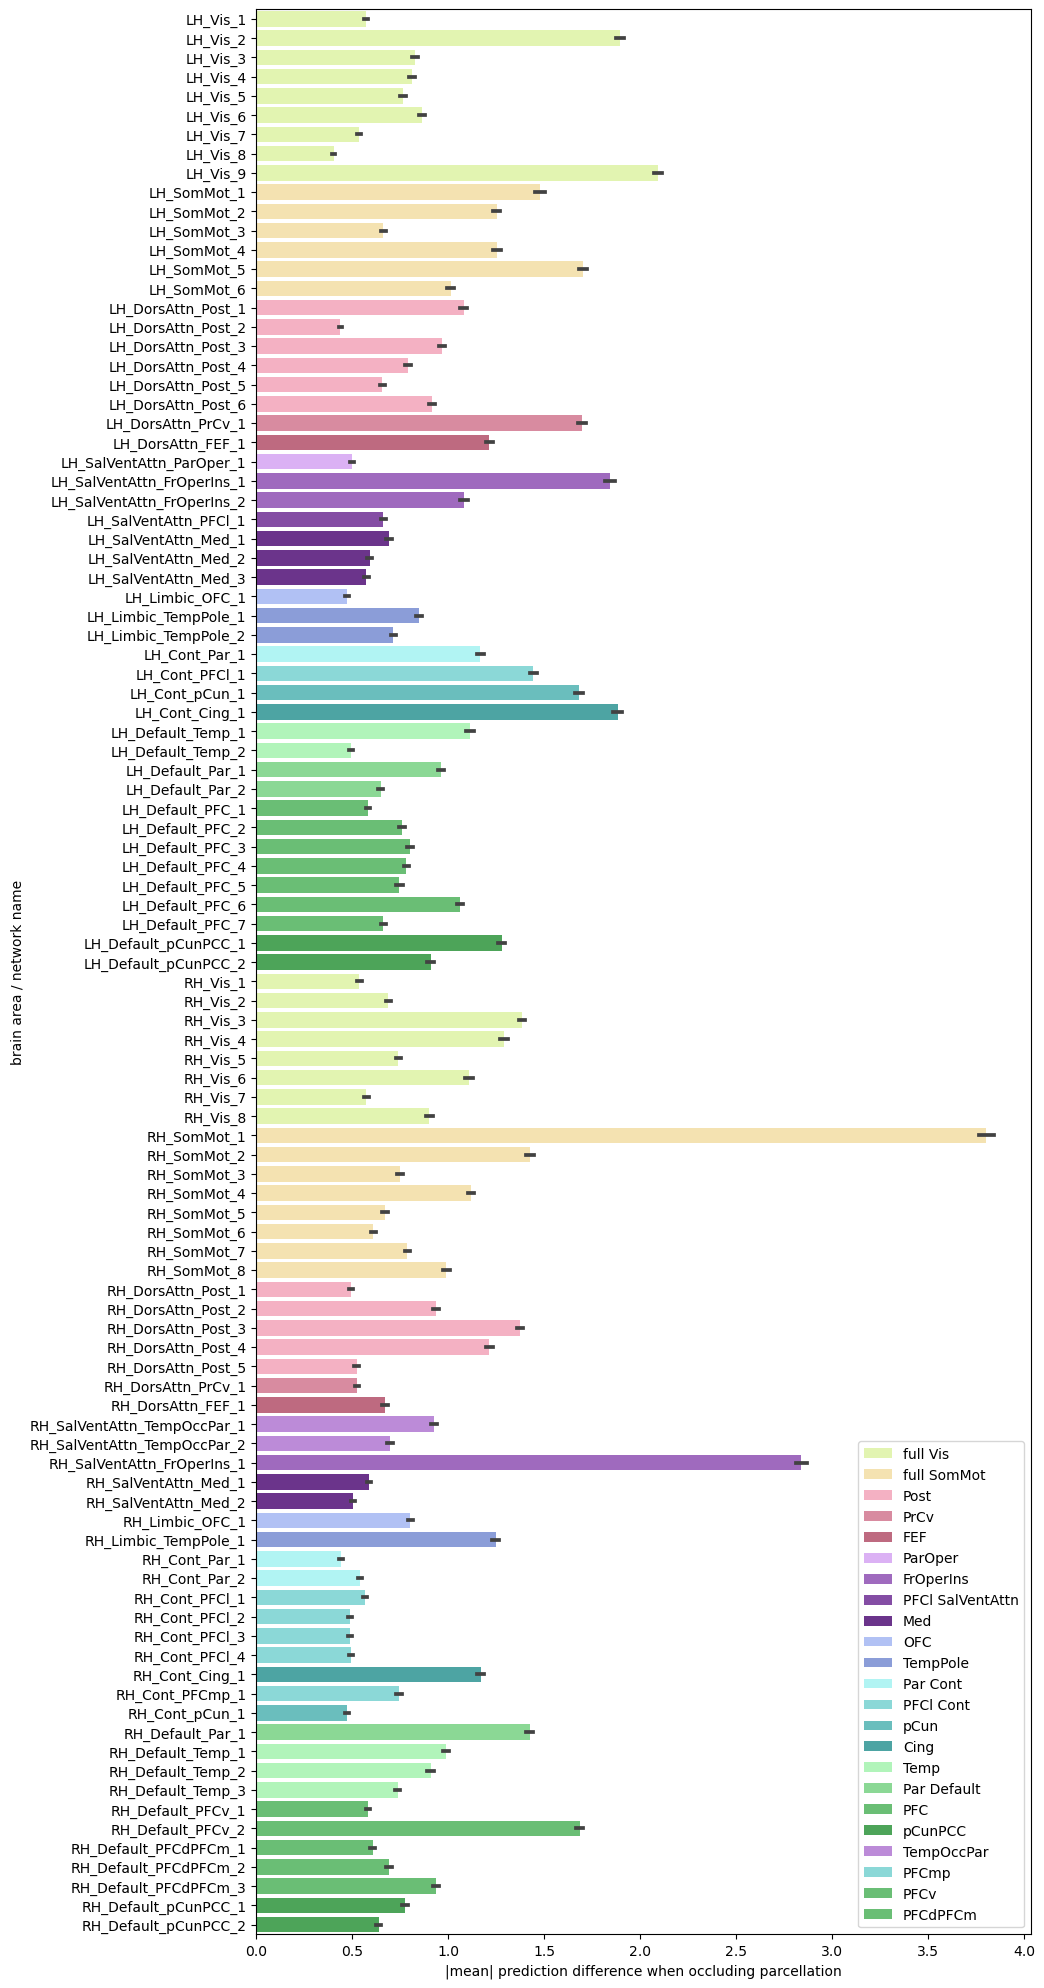

In [14]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='|mean| prediction difference when occluding parcellation',
       ylabel='brain area / network name')
ax.legend(loc='lower right')
plt.show()

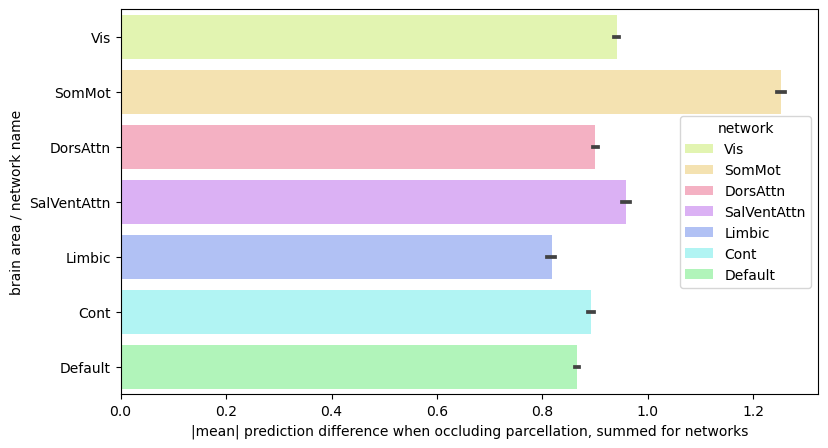

In [15]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='|mean| prediction difference when occluding parcellation, summed for networks',
       ylabel='brain area / network name')
plt.show()

In [19]:
# add area mean + area weight column
occlusion_df, area_mean_df = utils.calculate_areamean_weights_df(occlusion_df, 'abs pred diff')
# get weighted networks
weighted_networks_df = utils.get_weighted_network_average(occlusion_df, value='mean area abs pred diff')
weighted_networks_df

,network,weighted mean
0,Vis,0.941274
1,SomMot,1.252148
2,DorsAttn,0.865333
3,SalVentAttn,0.911058
4,Limbic,0.844690
5,Cont,0.814503
6,Default,0.836907


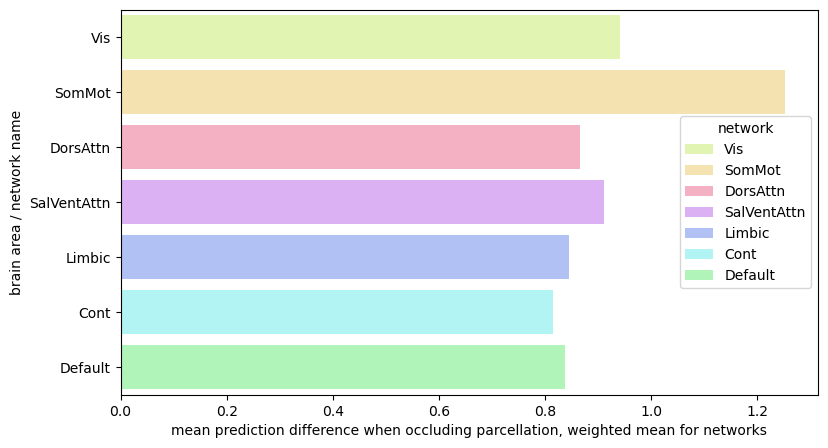

In [20]:
# weighted network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=weighted_networks_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation, weighted mean for networks',
       ylabel='brain area / network name')
plt.show()

## Local explanations

In [30]:
young_sub = utils.get_sub_occlusion(1137757,'deep','pred diff')
old_sub = utils.get_sub_occlusion(1318155,'deep','pred diff') 
younger_pred_sub = utils.get_sub_occlusion(1184162,'deep','pred diff') 
older_pred_sub = utils.get_sub_occlusion(1364474,'deep','pred diff') 
min_bag_diff_sub = utils.get_sub_occlusion(1031078,'deep','pred diff') 
max_bag_diff_sub = utils.get_sub_occlusion(1457519,'deep','pred diff') 

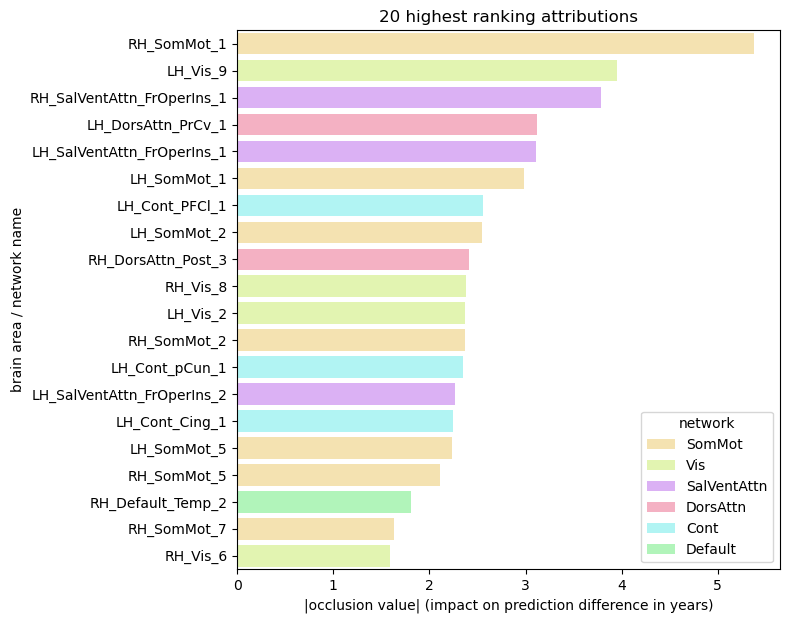

In [34]:
viz.simple_local_explanation(young_sub,'parcellation',
                             'occlusion','prediction difference')

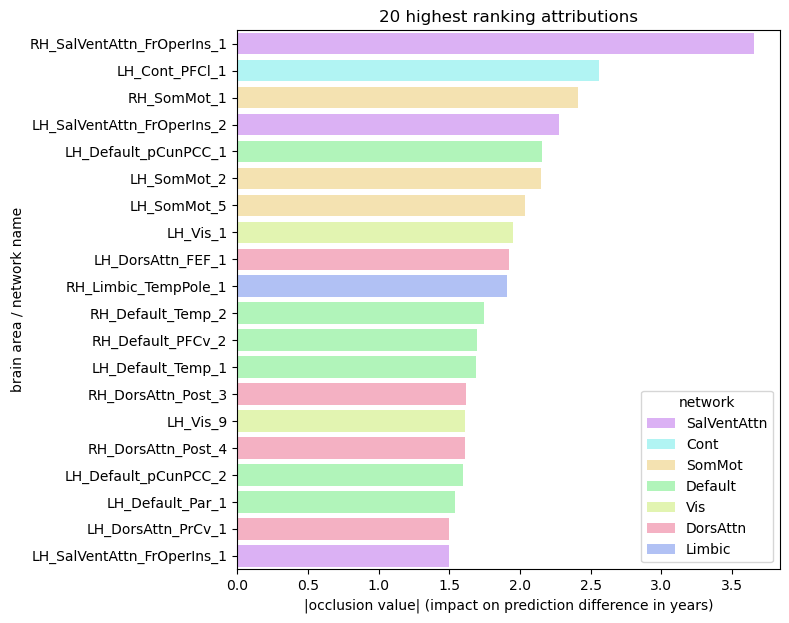

In [35]:
viz.simple_local_explanation(old_sub,'parcellation',
                             'occlusion','prediction difference')

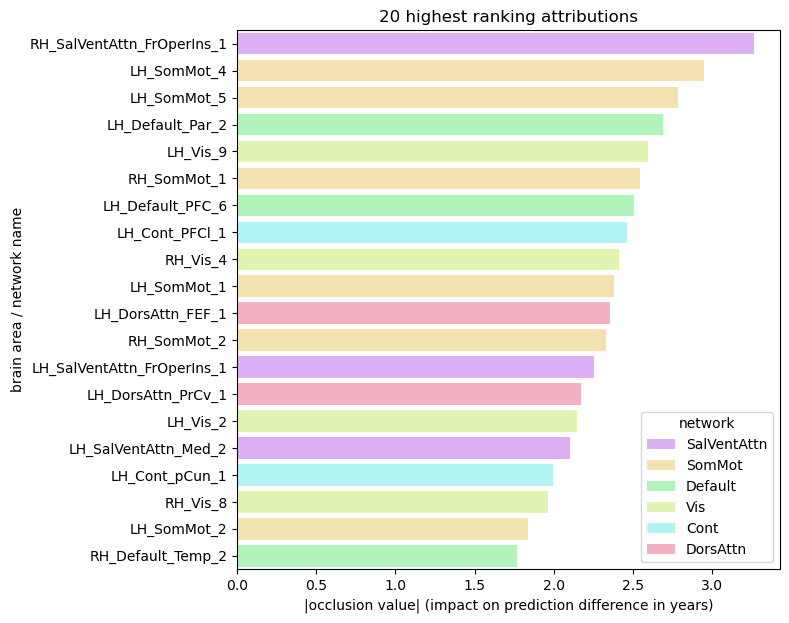

In [36]:
viz.simple_local_explanation(younger_pred_sub,'parcellation',
                             'occlusion','prediction difference')

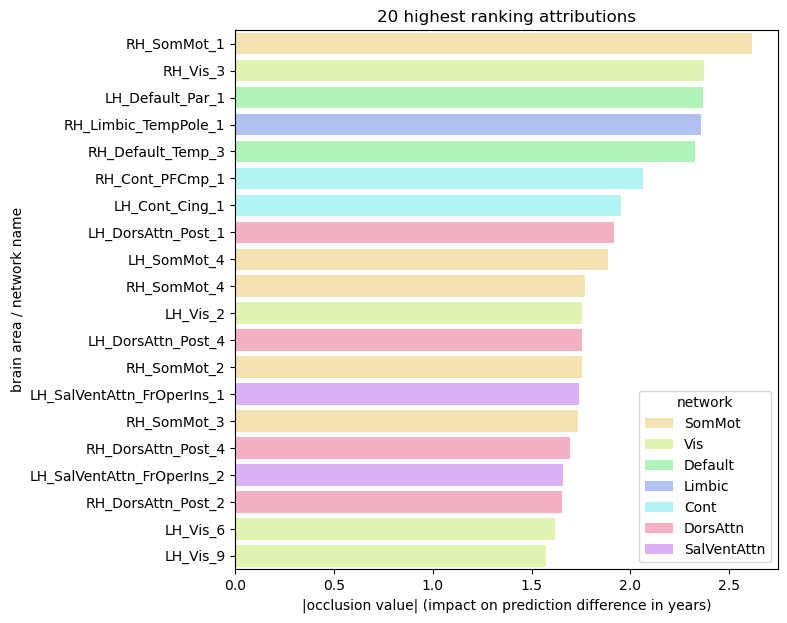

In [37]:
viz.simple_local_explanation(older_pred_sub,'parcellation',
                             'occlusion','prediction difference')

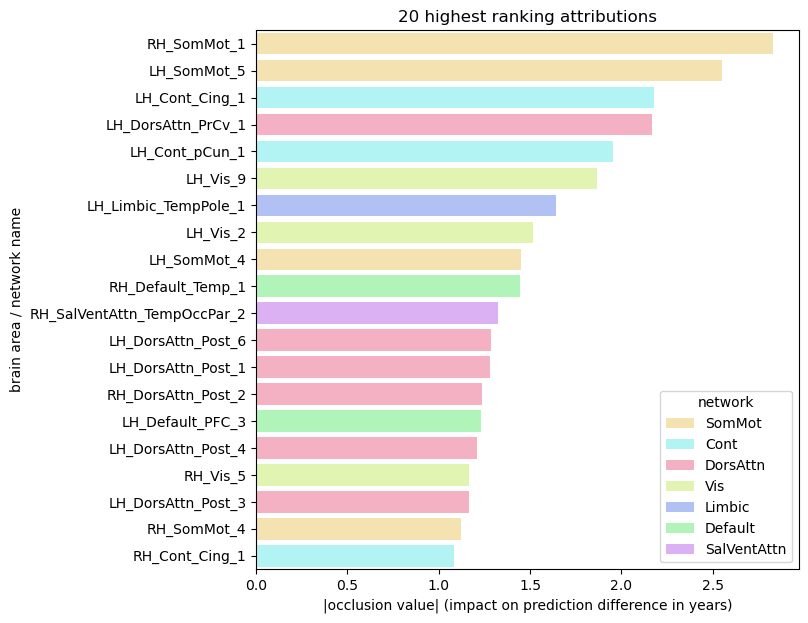

In [38]:
viz.simple_local_explanation(min_bag_diff_sub,'parcellation',
                             'occlusion','prediction difference')

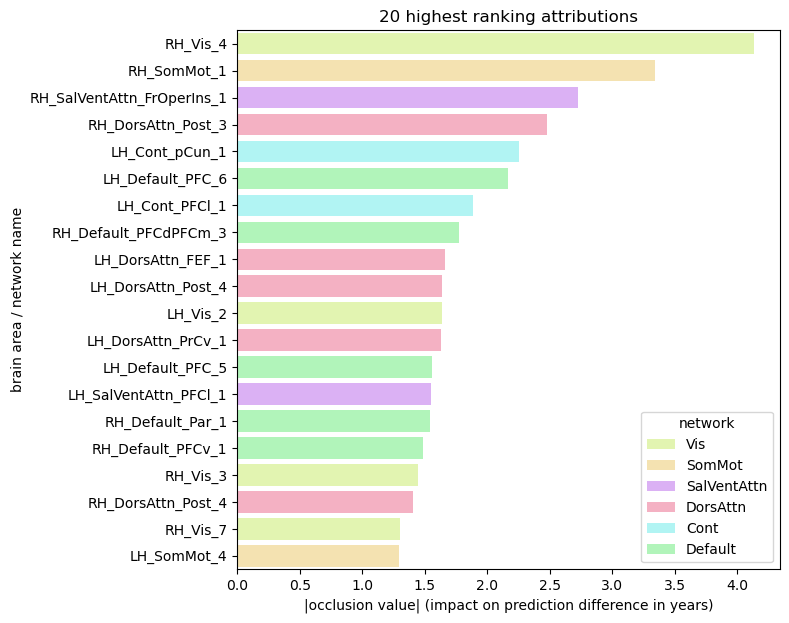

In [39]:
viz.simple_local_explanation(max_bag_diff_sub,'parcellation',
                             'occlusion','prediction difference')